In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [4]:
import h5py

In [5]:
f = h5py.File('../../pisa/resources/events/pingu_v39/events__pingu__v39__runs_620-622__proc_v5.1__joined_G_nue_cc+nuebar_cc_G_numu_cc+numubar_cc_G_nutau_cc+nutaubar_cc_G_nuall_nc+nuallbar_nc.hdf5')

In [6]:
for name in f.iterkeys():
    print name

nue
nue_bar
numu
numu_bar
nutau
nutau_bar


In [7]:
print f['numu']['cc'].keys()
e_numu = np.array(f['numu']['cc']['reco_energy'])
pid_numu = np.array(f['numu']['cc']['pid'])
wei_numu = np.array(f['numu']['cc']['weighted_aeff'])

[u'pid', u'reco_coszen', u'reco_energy', u'true_coszen', u'true_energy', u'weighted_aeff']


In [8]:
print e_numu, pid_numu, wei_numu

[ 157.33312438   28.39073309   56.8262332  ...,   11.30262662   29.92501916
    2.12568184] [ 0.96370754  0.9482486  -0.04312066 ...,  0.86676058  0.10035209
  0.50749321] [  5.50730554e-06   2.27624544e-06   5.13043743e-06 ...,   1.77426205e-07
   8.32043847e-07   5.57475955e-08]


In [9]:
track_map = (pid_numu > 0.55)
print track_map

[ True  True False ...,  True False False]


# Unweighted distributions

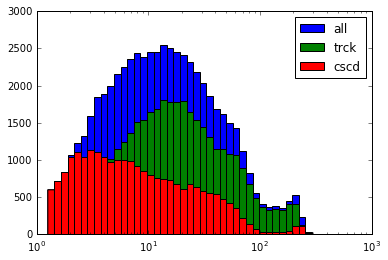

In [10]:
n_a, bins, patches = plt.hist(e_numu, bins=np.logspace(1E-1, 3), label='all')
n_t, bins, patches = plt.hist(e_numu[track_map], bins=np.logspace(1E-1, 3), label='trck')
n_c, bins, patches = plt.hist(e_numu[~track_map], bins=np.logspace(1E-1, 3), label='cscd')
plt.semilogx()
plt.legend()

# Weighted distributions

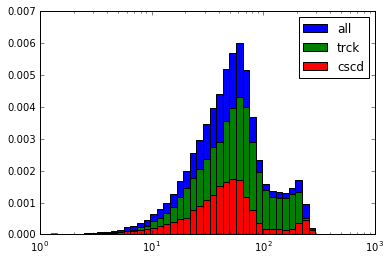

In [9]:
n_a, bins, patches = plt.hist(e_numu, weights=wei_numu, bins=np.logspace(1E-1, 3), label='all')
n_t, bins, patches = plt.hist(e_numu[track_map], weights=wei_numu[track_map], bins=np.logspace(1E-1, 3), label='trck')
n_c, bins, patches = plt.hist(e_numu[~track_map], weights=wei_numu[~track_map], bins=np.logspace(1E-1, 3), label='cscd')
plt.semilogx()
plt.legend()

#### Cascade plot to match against

[]

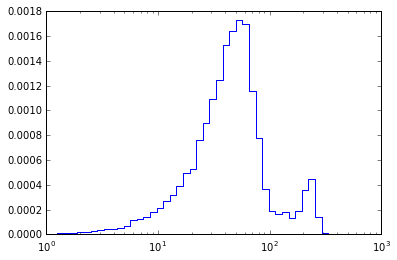

In [10]:
diff = n_a-n_t
diff = np.concatenate(([diff[0]], diff))
plt.plot(bins, diff, drawstyle='steps-pre')
plt.semilogx()

# Without weights

In [11]:
e_numu_trck = e_numu[track_map]
e_numu_cscd = e_numu[~track_map]
trck_hist, bin_edges = np.histogram(e_numu_trck, bins=bins)
cscd_hist, bin_edges = np.histogram(e_numu_cscd, bins=bins)

prob_map_trck = np.ma.masked_invalid(trck_hist / (trck_hist+cscd_hist))
prob_map_cscd = np.ma.masked_invalid(cscd_hist / (trck_hist+cscd_hist))

/common/users/mandalia/programs/Python-2.7.10/venv2_7/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in divide
/common/users/mandalia/programs/Python-2.7.10/venv2_7/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in divide


[]

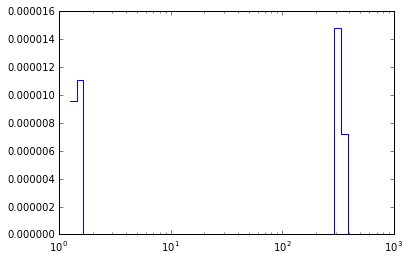

In [12]:
trck_r = n_a*prob_map_cscd
trck_r = np.concatenate(([trck_r[0]], trck_r))
plt.plot(bins, trck_r, drawstyle='steps-pre')
plt.semilogx()

# With weights

In [13]:
e_numu_trck = e_numu[track_map]
e_numu_cscd = e_numu[~track_map]
trck_hist, bin_edges = np.histogram(e_numu_trck, weights=wei_numu[track_map], bins=bins)
cscd_hist, bin_edges = np.histogram(e_numu_cscd, weights=wei_numu[~track_map], bins=bins)

prob_map_trck = np.ma.masked_invalid(trck_hist / (trck_hist+cscd_hist))
prob_map_cscd = np.ma.masked_invalid(cscd_hist / (trck_hist+cscd_hist))

/common/users/mandalia/programs/Python-2.7.10/venv2_7/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide
/common/users/mandalia/programs/Python-2.7.10/venv2_7/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in divide


[]

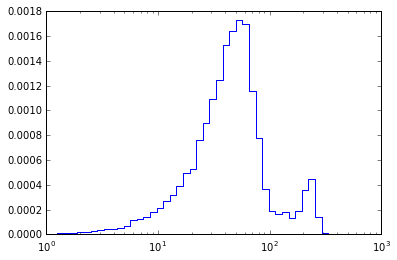

In [14]:
trck_r = n_a*prob_map_cscd
trck_r = np.concatenate(([trck_r[0]], trck_r))
plt.plot(bins, trck_r, drawstyle='steps-pre')
plt.semilogx()